# 과제 1: 데이터 알아보기

## 1-1. 데이터 로드
AB_NYC_2019.csv 데이터 파일을 데이터 프레임 형태로 로드하여 df 변수에 저장합니다.

In [75]:
import pandas as pd
import seaborn as sns

In [76]:
df = pd.read_csv('./AB_NYC_2019.csv')

## 1-2. 데이터 탐색 및 전처리
- 로드한 데이터 일부를 살펴보고, 각 컬럼별 통계값을 뽑습니다.
- 결측치가 있다면 적절한 방법으로 처리합니다.

결측치 데이터가 있는지 확인함.  
isnull을 통해 확인해본 결과 null 값은 없는 것으로 보임.

In [77]:
df.dropna(inplace=True)
df.isnull().any()

id                                False
name                              False
host_id                           False
host_name                         False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                       False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

데이터프레임의 5개 출력

In [78]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [79]:
# price 가 0인 부분이 있는데... 일단 0을 제외하는 아래 코드는 주석처리하기로 함. -> price 0 인 데이터 포함
#df = df[df['price'] > 0]

In [80]:
print(df.describe(include='all')) # 숫자형, 문자형 모두 보기 include = 'all'

                  id                 name       host_id host_name  \
count   3.882100e+04                38821  3.882100e+04     38821   
unique           NaN                38253           NaN      9885   
top              NaN  Home away from home           NaN   Michael   
freq             NaN                   12           NaN       335   
mean    1.810081e+07                  NaN  6.424582e+07       NaN   
std     1.069372e+07                  NaN  7.589752e+07       NaN   
min     2.539000e+03                  NaN  2.438000e+03       NaN   
25%     8.721444e+06                  NaN  7.029525e+06       NaN   
50%     1.887286e+07                  NaN  2.837092e+07       NaN   
75%     2.756746e+07                  NaN  1.018905e+08       NaN   
max     3.645581e+07                  NaN  2.738417e+08       NaN   

       neighbourhood_group neighbourhood      latitude     longitude  \
count                38821         38821  38821.000000  38821.000000   
unique                   5 

## 1-3. 기술 통계 및 시각화
- 가격 (price) 컬럼에 대한 분포 파악을 위해, 기술 통계값을 뽑고 및 시각화 도구를 사용하여 그림을 그립니다.

In [81]:
price_mean = df['price'].mean()
price_std = df['price'].std()
price_median = df['price'].median()
price_mode = df['price'].mode()
price_min = df['price'].min()
price_max = df['price'].max()


print(f'mean : {price_mean}')
print(f'median : {price_median}')
print(f'std : {price_std}')
print(f'mode : {price_mode}')
print(f'min : {price_min}')
print(f'max : {price_max}')
print()
print(df['price'].describe(include='all'))


mean : 142.33252621004095
median : 101.0
std : 196.9947559183469
mode : 0    150
Name: price, dtype: int64
min : 0
max : 10000

count    38821.000000
mean       142.332526
std        196.994756
min          0.000000
25%         69.000000
50%        101.000000
75%        170.000000
max      10000.000000
Name: price, dtype: float64


In [82]:
len(df['price'])

df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


<Axes: >

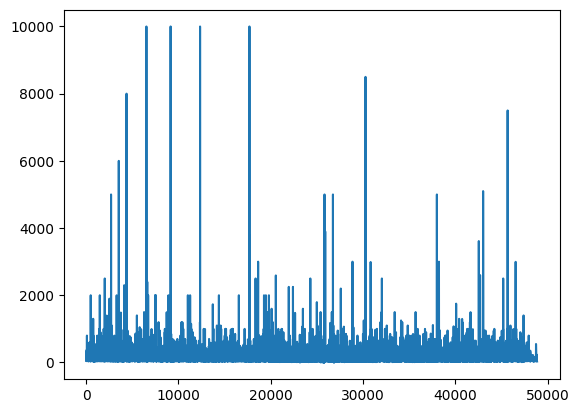

In [83]:
df['price'].plot()

<Axes: >

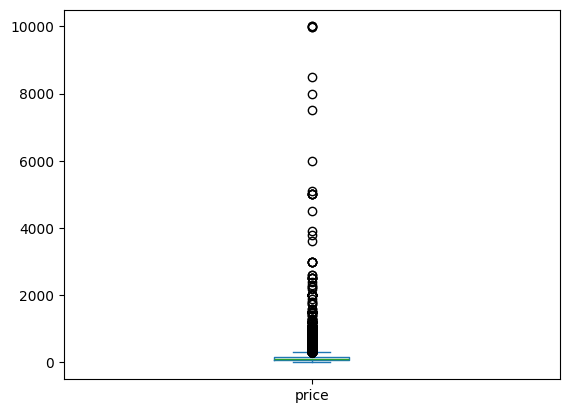

In [84]:
df['price'].plot(kind='box')

## 1-4. 기술 통계 및 시각화
- 가격과 리뷰 수(number of reviews) 간의 관계를 살펴보기 위해, 관련된 기술 통계값을 뽑고 시각화 도구를 사용하여 그림을 그립니다.

In [85]:
print(df['number_of_reviews'].describe(include='all'))

count    38821.000000
mean        29.290255
std         48.182900
min          1.000000
25%          3.000000
50%          9.000000
75%         33.000000
max        629.000000
Name: number_of_reviews, dtype: float64


상관계수 값을 계산해봄.

In [86]:
df[['number_of_reviews', 'price']].corr()

,number_of_reviews,price
number_of_reviews,1.000000,-0.035924
price,-0.035924,1.000000


x 축을 리뷰 수, y 축을 가격으로 하여 산점도 출력해봄.

<Axes: xlabel='number_of_reviews', ylabel='price'>

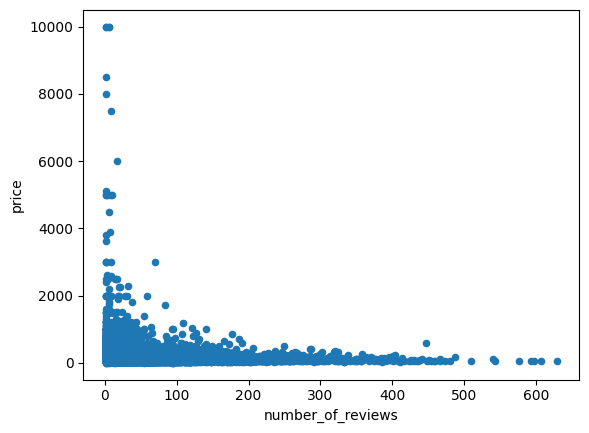

In [87]:
df.plot(x='number_of_reviews',y='price', kind='scatter')

## 1-5. 기술 통계 및 시각화
- neighborhood group과 가격의 관계를 알아보기 위해, 그룹별 가격의 분포에 대한 기술 통계값을 뽑고 시각화 도구를 사용하여 그림을 그려봅니다.

In [88]:
# 그룹별로 묶은 데이터프레임
df_g = df.groupby(['neighbourhood_group'])
# 그룹별 가격의 분포에 대한 기술 통계값 출력
df_g['price'].describe(include='all')

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,875.0,79.558857,63.999121,0.0,45.0,65.0,95.0,800.0
Brooklyn,16439.0,121.463289,169.887979,0.0,60.0,94.0,150.0,10000.0
Manhattan,16621.0,180.071596,226.474061,10.0,90.0,140.0,200.0,9999.0
Queens,4572.0,95.783683,168.395210,10.0,50.0,72.0,109.0,10000.0
Staten Island,314.0,89.964968,65.864044,13.0,50.0,75.0,105.0,625.0


x 축을 지역그룹, y 축을 가격으로 하여 산점도를 출력해봄.  
다른 그룹보다 Staten Island, Bronx 의 최고 가격이 낮음. 위의 통계 값에서도 확인 가능.

<Axes: xlabel='neighbourhood_group', ylabel='price'>

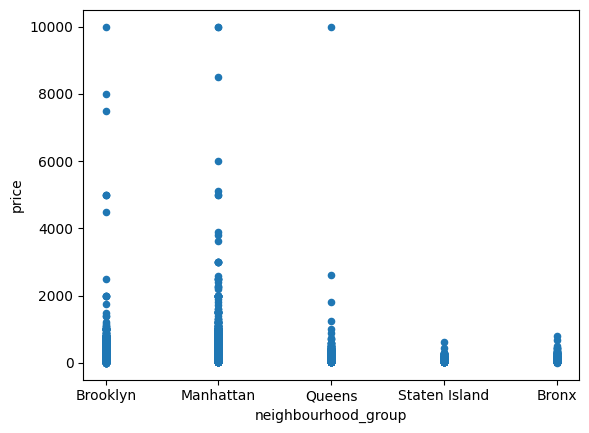

In [89]:
df.plot(x='neighbourhood_group',y='price', kind='scatter')

## 1-6. 그룹별 특징 자유 분석

- neighborhood group 에 따라 어떤 특징이 있는지 자유롭게 분석하고 결과의 의미를 해석하여 제시합니다.

#### 해석 1. neighbourhood_group에 따른 위도, 경도로 산점도 시각화

먼저 neighbourhood group에 따라 longtitude와 latitude 정보를 이용하여 산점도를 시각화 해봄.  
neighbourhood group은 색으로 구분됨.  
가격에 따라 점의 크기가 다르게 함.  

<Axes: xlabel='longitude', ylabel='latitude'>

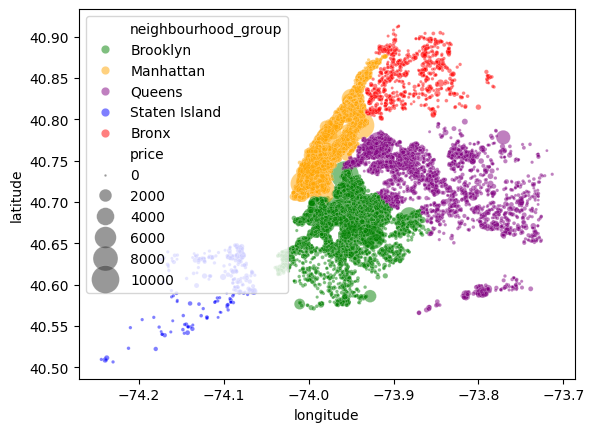

In [133]:
sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group', size="price",
            sizes=(3, 400), palette=['green','orange','purple','blue','red'], alpha=0.5)

위의 산점도를 통해 위치와 가격 정보를 한눈에 볼 수 있었음.  그러나 데이터가 많아서 가격을 보기에는 불편함이 있음.  

----

#### 해석 2. 가격 비교

neighborhood group 별 가격 합계 비교함.

<Axes: xlabel='neighbourhood_group'>

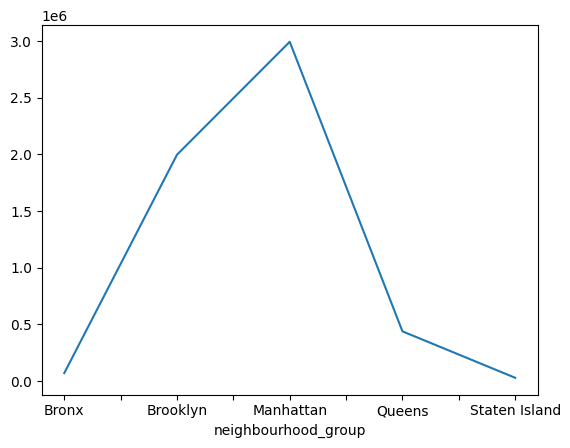

In [90]:
df_g['price'].agg('sum').plot()

neighborhood group 별 가격 평균 비교함.  
가격 평균은 Manhatten이 가장 높게 나옴.  

<Axes: xlabel='neighbourhood_group'>

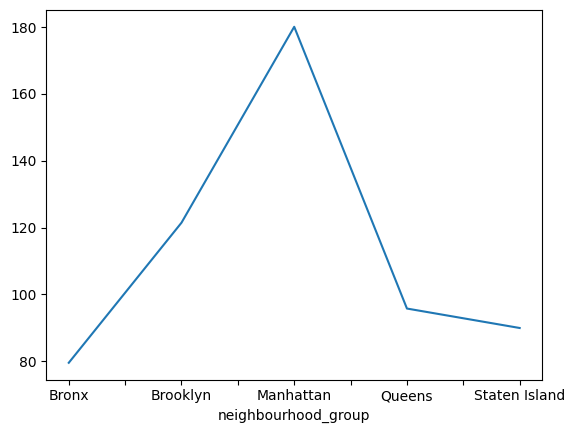

In [91]:
df_g['price'].mean().plot()

그룹별로 분포도를 그려봄.  
Queens, Manhattan, Brooklyn의 경우는 특히 심하게 치우친 Positively skewed 분포인 것을 알 수 있음.  

In [92]:
bronx_g = df[df['neighbourhood_group'] == 'Bronx'].copy()
stisland_g = df[df['neighbourhood_group'] == 'Staten Island'].copy()
queens_g = df[df['neighbourhood_group'] == 'Queens'].copy()
manhattan_g = df[df['neighbourhood_group'] == 'Manhattan'].copy()
brooklyn_g = df[df['neighbourhood_group'] == 'Brooklyn'].copy()

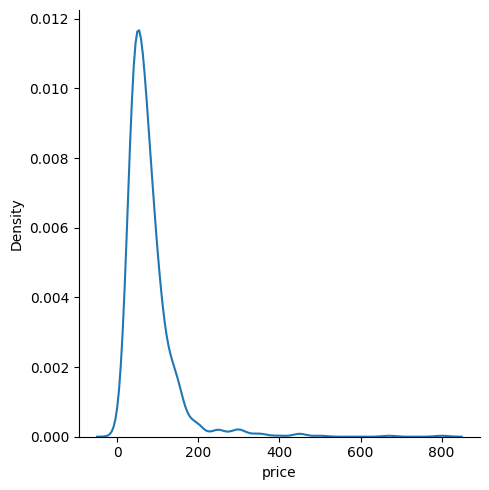

In [122]:
sns.displot(data=df[df['neighbourhood_group'] == 'Bronx'], x='price', kind='kde')

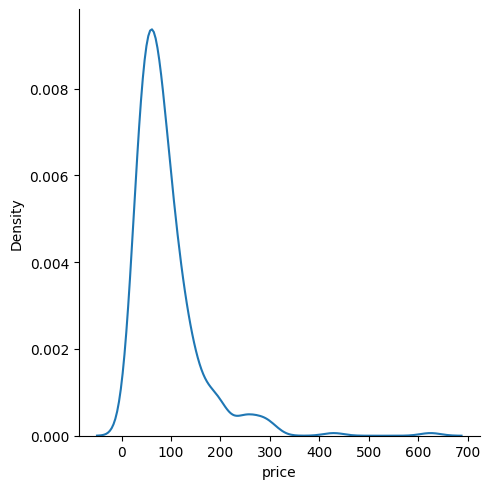

In [94]:
sns.displot(data=df[df['neighbourhood_group'] == 'Staten Island'], x='price', kind='kde')

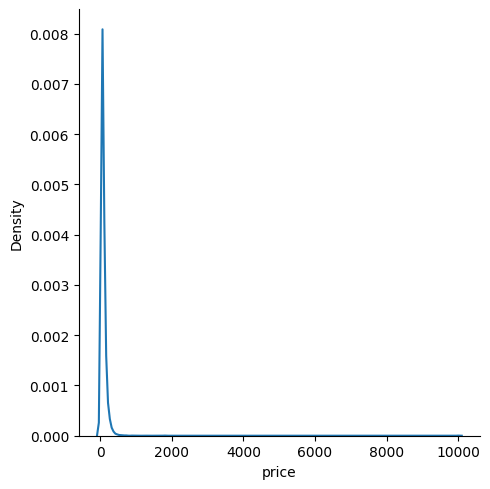

In [95]:
sns.displot(data=df[df['neighbourhood_group'] == 'Queens'], x='price', kind='kde')

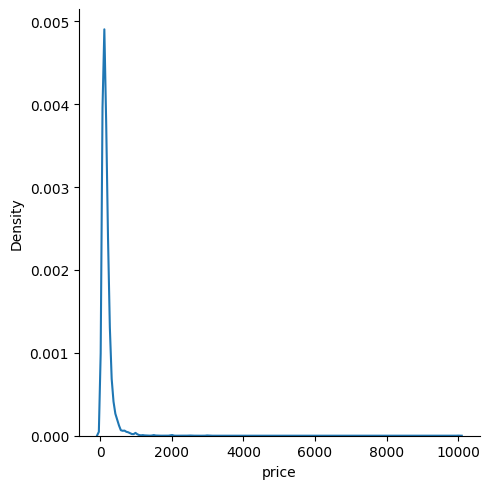

In [96]:
sns.displot(data=df[df['neighbourhood_group'] == 'Manhattan'], x='price', kind='kde')

<Axes: xlabel='price', ylabel='Count'>

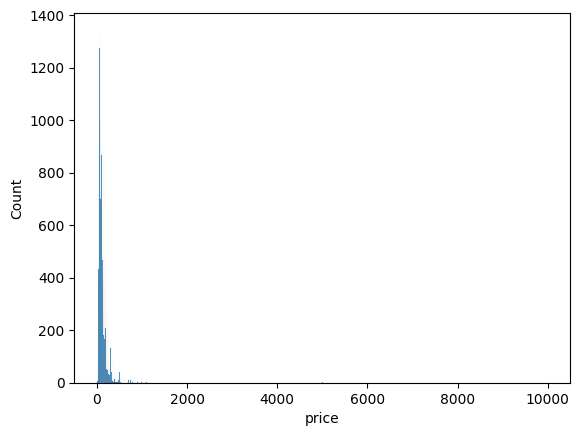

In [109]:
#sns.displot(data=df[df['neighbourhood_group'] == 'Brooklyn'], x='price', kind='kde')
sns.histplot(data=df[df['neighbourhood_group'] == 'Brooklyn'], x='price')

분포에 log를 취하여 정규분포 모양에 좀 더 가까워지도록 함.  
0에는 로그를 취하면 -inf 가 되므로 0을 작은 값인 0.001로 대체함.

In [98]:
import numpy as np


bronx_g['price'] = bronx_g['price'].replace(0, 0.001)
stisland_g['price'] = stisland_g['price'].replace(0, 0.001)
queens_g['price'] = queens_g['price'].replace(0, 0.001)
manhattan_g['price'] = manhattan_g['price'].replace(0, 0.001)
brooklyn_g['price'] = brooklyn_g['price'].replace(0, 0.001)

bronx_g['log_price'] = np.log(bronx_g['price'])
stisland_g['log_price'] = np.log(stisland_g['price'])
queens_g['log_price'] = np.log(queens_g['price'])
manhattan_g['log_price'] = np.log(manhattan_g['price'])
brooklyn_g['log_price'] = np.log(brooklyn_g['price'])

<Axes: xlabel='log_price', ylabel='Count'>

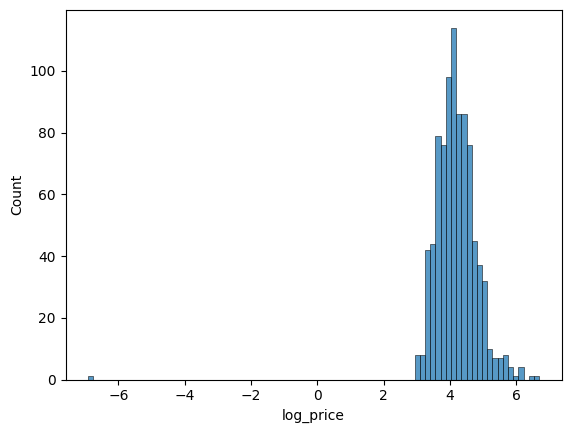

In [113]:
sns.histplot(data=bronx_g, x='log_price')

<Axes: xlabel='log_price', ylabel='Count'>

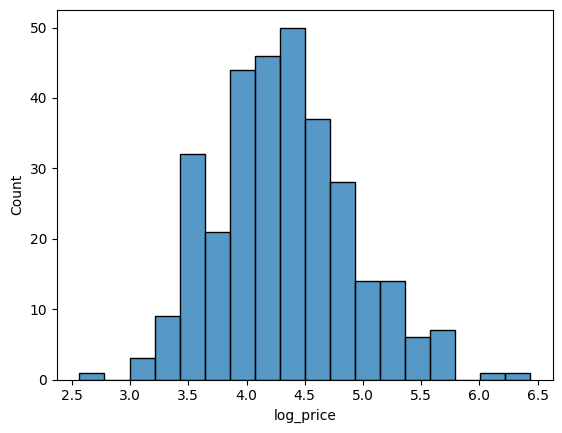

In [116]:
sns.histplot(data=stisland_g, x='log_price')

<Axes: xlabel='log_price', ylabel='Count'>

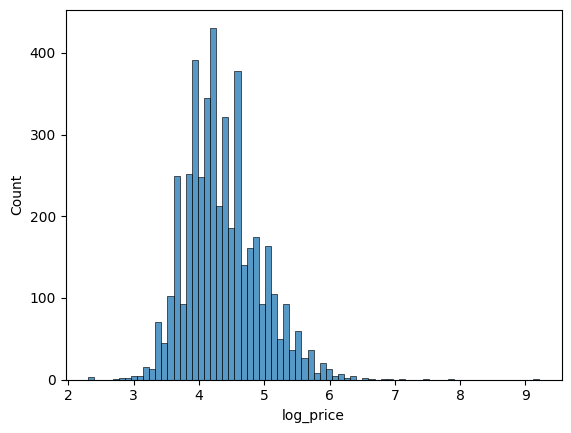

In [117]:
sns.histplot(data=queens_g, x='log_price')

<Axes: xlabel='log_price', ylabel='Count'>

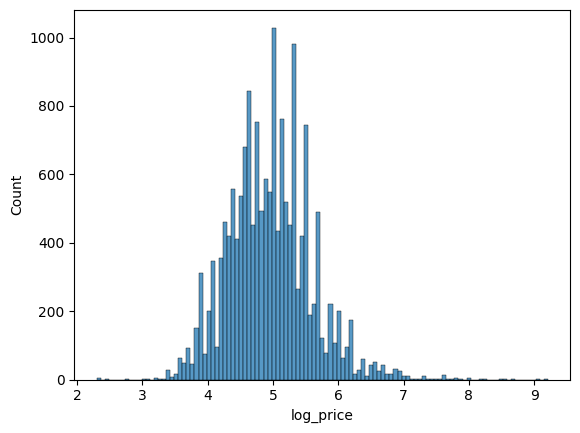

In [118]:
sns.histplot(data=manhattan_g, x='log_price')

<Axes: xlabel='log_price', ylabel='Count'>

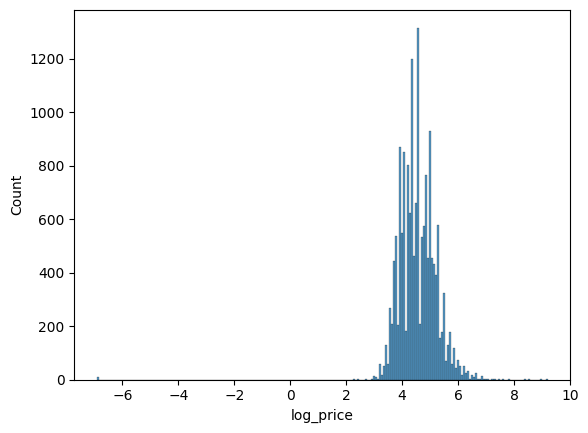

In [119]:
sns.histplot(data=brooklyn_g, x='log_price')

----------

아래는 의미 없는 듯...   
아래에서 price에 대한 Outlier을 제거하는데,  
이 Outlier 값들이 중요한 데이터로 보임.  
따라서 Outlier 제거보다는 log 변환을 하여 Outlier을 살리고 상관관계 분석에 응용하는 것이 차라리 더 나을 듯

Boxplot으로 price에 대해 시각화를 해보았을 때, Outlier에 해당되는 데이터가 많아보임.  
이상치(Outlier) 데이터를 확인하고 IQR 을 이용하여 이에 대해 처리 시도함.

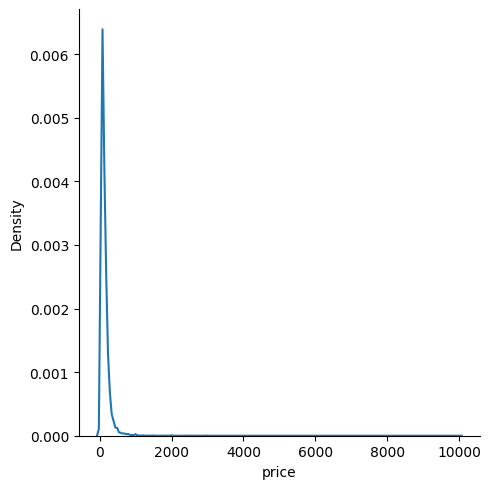

In [100]:
sns.displot(data=df, x='price', kind='kde')

<Axes: >

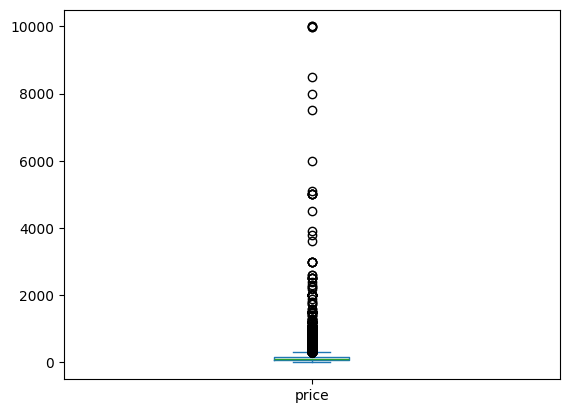

In [101]:
df['price'].plot(kind='box')

IQR 값을 계산하고 필터링 계산을 거친 데이터프레임을 filtered에 저장함.

In [102]:
q1=df['price'].quantile(0.25)
q2=df['price'].quantile(0.5)
q3=df['price'].quantile(0.75)

iqr = q3 - q1
print(iqr)

filtered = df.query('(@q1 - 1.5 * @iqr) <= price <= (@q3 + 1.5 * @iqr)')

101.0


filtered를 박스플롯으로 시각화함. 전보다 Outlier에 해당하는 데이터가 제거된 것을 확인할 수 있음.

<Axes: >

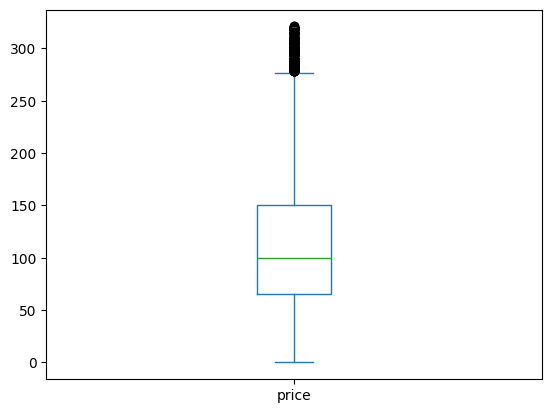

In [103]:
filtered['price'].plot(kind='box')

<Axes: xlabel='neighbourhood_group', ylabel='price'>

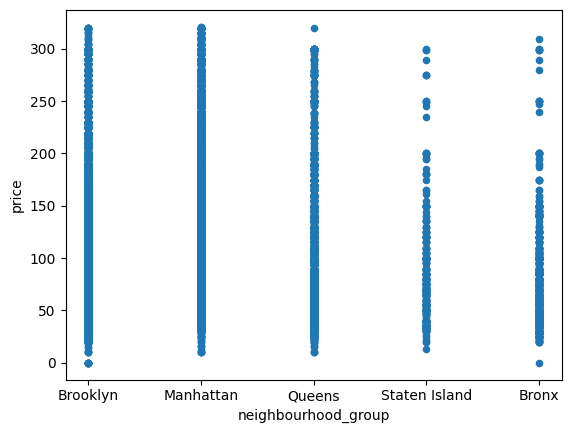

In [104]:
filtered.plot(x='neighbourhood_group',y='price', kind='scatter')

In [105]:
filtered_g = filtered.groupby(['neighbourhood_group'])
filtered_g['price'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,864.0,74.664352,44.588925,0.0,45.0,62.5,90.0,309.0
Brooklyn,15891.0,105.819520,59.496325,0.0,60.0,90.0,140.0,320.0
Manhattan,15171.0,141.245930,66.820144,10.0,89.0,130.0,189.0,321.0
Queens,4506.0,87.659787,52.096294,10.0,50.0,70.0,105.0,320.0
Staten Island,312.0,87.163462,55.389897,13.0,50.0,73.5,105.0,300.0


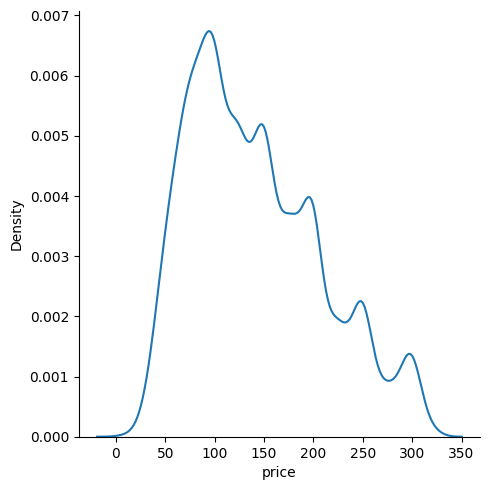

In [106]:
sns.displot(data=filtered[filtered['neighbourhood_group'] == 'Manhattan'], x='price', kind='kde')

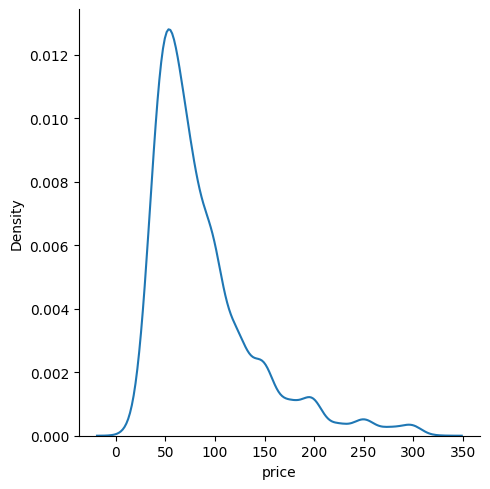

In [107]:
sns.displot(data=filtered[filtered['neighbourhood_group'] == 'Queens'], x='price', kind='kde')